In [1]:
from gpybench import datasets as ds
from gpybench.utils import get_off_diagonal, numpify, print_mean_std, isnotebook
from gpybench.metrics import wasserstein, kl_div_1d, nll, roberts, zscore
import gpytools.maths as gm
import gpybench.plotting as gplt
import gpytorch
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from contextlib import ExitStack

import rff

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.


In [2]:
n = 1000
ls = .10
ks = 1.0
d = 10
nv = 1e-3

In [3]:
X = torch.randn((n,d))/torch.sqrt(torch.as_tensor(d))
kernel = gpytorch.kernels.RBFKernel()
kernel.lengthscale = ls
kernel = gpytorch.kernels.ScaleKernel(kernel)
kernel.outputscale = ks

K = kernel(X).add_jitter(nv)
u = torch.randn((n,1))

In [4]:
f0 = gm.msqrt(K.evaluate().detach().numpy()) @ u.detach().numpy()

In [5]:
J = 10
Q = int(np.log(n))
K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

44.169309909837004


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/rff/Sweep/rff.py:342: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be re

In [6]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

44.169309909837004


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

In [7]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

44.169309909837004


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

In [8]:
f0 = gm.msqrt(K.evaluate().detach().numpy()) @ u.detach().numpy()

In [9]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

44.169309909837004


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  torch.sum(mul_storage, -2, keepdim=True, out=alpha)


In [10]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

44.169309909837004


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

In [11]:
from gpybench import datasets as ds
from gpybench.utils import get_off_diagonal, numpify, print_mean_std, isnotebook
from gpybench.metrics import wasserstein, kl_div_1d, nll, roberts, zscore
import gpytools.maths as gm
import gpybench.plotting as gplt
import gpytorch
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from contextlib import ExitStack

import rff

In [12]:
n = 1000
ls = .10
ks = 1.0
d = 10
nv = 1e-3

In [13]:
X = torch.randn((n,d))/torch.sqrt(torch.as_tensor(d))
kernel = gpytorch.kernels.RBFKernel()
kernel.lengthscale = ls
kernel = gpytorch.kernels.ScaleKernel(kernel)
kernel.outputscale = ks

K = kernel(X).add_jitter(nv)
u = torch.randn((n,1))

In [14]:
f0 = gm.msqrt(K.evaluate().detach().numpy()) @ u.detach().numpy()

In [15]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

44.4053390296057


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

In [16]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

44.4053390296057


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

In [17]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(


44.405339029606566


In [18]:
from gpybench import datasets as ds
from gpybench.utils import get_off_diagonal, numpify, print_mean_std, isnotebook
from gpybench.metrics import wasserstein, kl_div_1d, nll, roberts, zscore
import gpytools.maths as gm
import gpybench.plotting as gplt
import gpytorch
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from contextlib import ExitStack

import rff

In [19]:
n = 1000
ls = 1.0
ks = 1.0
d = 1
nv = 1e-6

In [20]:
X = torch.randn((n,d))/torch.sqrt(torch.as_tensor(d))
kernel = gpytorch.kernels.RBFKernel()
kernel.lengthscale = ls
kernel = gpytorch.kernels.ScaleKernel(kernel)
kernel.outputscale = ks

K = kernel(X).add_jitter(nv)
u = torch.randn((n,1))

In [21]:
f0 = gm.msqrt(K.evaluate().detach().numpy()) @ u.detach().numpy()

In [22]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

9.532014800568057


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(


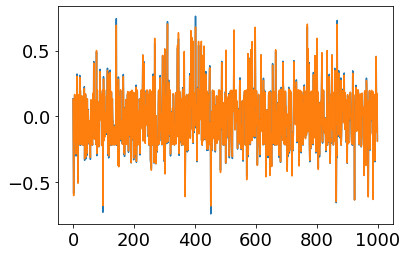

In [24]:
with torch.no_grad():
    plt.plot(f0)
    plt.plot(f)

In [25]:
J = 1
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

23.540777221045193


In [26]:
J = 1
Q = 1#int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

6.84182929823629


In [27]:
J = 10
Q = 1#int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

7.85370372500794


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(


In [28]:
J = 10
Q = 1#int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

8.598593472617214


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

In [29]:
J = 1
Q = 1#int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

9.531184914138738


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(


In [30]:
np.linalg.cond(K.detach().numpy())

615663058.2045463

In [31]:
K.evaluate()

tensor([[1.0000, 0.6777, 0.0011,  ..., 0.4475, 0.1820, 0.6789],
        [0.6777, 1.0000, 0.0190,  ..., 0.9282, 0.6285, 1.0000],
        [0.0011, 0.0190, 1.0000,  ..., 0.0523, 0.1802, 0.0189],
        ...,
        [0.4475, 0.9282, 0.0523,  ..., 1.0000, 0.8463, 0.9275],
        [0.1820, 0.6285, 0.1802,  ..., 0.8463, 1.0000, 0.6273],
        [0.6789, 1.0000, 0.0189,  ..., 0.9275, 0.6273, 1.0000]],
       grad_fn=<AddBackward0>)

In [32]:
from gpybench import datasets as ds
from gpybench.utils import get_off_diagonal, numpify, print_mean_std, isnotebook
from gpybench.metrics import wasserstein, kl_div_1d, nll, roberts, zscore
import gpytools.maths as gm
import gpybench.plotting as gplt
import gpytorch
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from contextlib import ExitStack

import rff

In [33]:
n = 2000
ls = 1.0
ks = 1.0
d = 1
nv = 1e-6

In [34]:
X = torch.randn((n,d))/torch.sqrt(torch.as_tensor(d))
kernel = gpytorch.kernels.RBFKernel()
kernel.lengthscale = ls
kernel = gpytorch.kernels.ScaleKernel(kernel)
kernel.outputscale = ks

K = kernel(X).add_jitter(nv)
u = torch.randn((n,1))

In [35]:
f0 = gm.msqrt(K.evaluate().detach().numpy()) @ u.detach().numpy()

In [36]:
J = 1
Q = 1#int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

14.857798271767404


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(


In [37]:
J = 1
Q = 1#int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

39.299423412193605


In [38]:
np.linalg.cond(K.detach().numpy())

1246342675.9132125

In [40]:
K._preconditioner(K)

TypeError: _preconditioner() takes 1 positional argument but 2 were given

In [41]:
K._preconditioner()

(<function gpytorch.lazy.added_diag_lazy_tensor.AddedDiagLazyTensor._preconditioner.<locals>.precondition_closure(tensor)>,
 tensor(-27427.6344, grad_fn=<SqueezeBackward0>))

In [43]:
K._preconditioner()[0](K.evaluate())

tensor([[ 1.0000e+00, -1.0182e-02, -2.2790e-03,  ...,  2.2519e-03,
         -5.1828e-03,  2.2217e-03],
        [ 0.0000e+00,  1.0270e+00,  1.2875e-02,  ..., -6.4702e-03,
          1.1773e-02, -6.6538e-03],
        [ 5.5511e-11,  4.5881e-02,  1.0261e+00,  ..., -1.1291e-02,
          1.8938e-02, -1.1768e-02],
        ...,
        [ 1.1102e-10, -1.9575e-02, -8.6023e-03,  ...,  1.0046e+00,
         -8.7097e-03,  4.7502e-03],
        [ 0.0000e+00,  5.4919e-02,  2.4819e-02,  ..., -1.2995e-02,
          1.0247e+00, -1.3292e-02],
        [ 1.1102e-10, -1.2921e-02, -9.3806e-03,  ...,  3.3275e-03,
         -4.7224e-03,  1.0035e+00]], grad_fn=<MulBackward0>)

In [45]:
rff.ID_Preconditioner(K)[0](K.evaluate())

tensor([[ 1.0000e+00, -1.0182e-02, -2.2790e-03,  ...,  2.2519e-03,
         -5.1828e-03,  2.2217e-03],
        [ 0.0000e+00,  1.0270e+00,  1.2875e-02,  ..., -6.4702e-03,
          1.1773e-02, -6.6538e-03],
        [ 5.5511e-11,  4.5881e-02,  1.0261e+00,  ..., -1.1291e-02,
          1.8938e-02, -1.1768e-02],
        ...,
        [ 1.1102e-10, -1.9575e-02, -8.6023e-03,  ...,  1.0046e+00,
         -8.7097e-03,  4.7502e-03],
        [ 0.0000e+00,  5.4919e-02,  2.4819e-02,  ..., -1.2995e-02,
          1.0247e+00, -1.3292e-02],
        [ 1.1102e-10, -1.2921e-02, -9.3806e-03,  ...,  3.3275e-03,
         -4.7224e-03,  1.0035e+00]], grad_fn=<MulBackward0>)

In [46]:
K._preconditioner

<bound method AddedDiagLazyTensor._preconditioner of <gpytorch.lazy.added_diag_lazy_tensor.AddedDiagLazyTensor object at 0x143d425e0>>

In [47]:
rff.ID_Preconditioner(K)

(<function rff.ID_Preconditioner.<locals>.precondition_closure(tensor)>,
 tensor(-27427.6344, grad_fn=<SqueezeBackward0>))

In [49]:
gpytorch.settings.max_preconditioner_size.value()

15

In [50]:
J = 1
Q = 1#int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

39.299423412193605


In [51]:
J = 1
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

34.20518935638283


In [52]:
J = 10
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

14.94735397961739


/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(


In [53]:
J = int(np.log(n)*np.sqrt(n))
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(0))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(


14.892526946128378


In [54]:
J = int(np.log(n)*np.sqrt(n))
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

14.857263062291924


In [55]:
J

339

In [56]:
J = 1000#int(np.log(n)*np.sqrt(n))
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-4))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

14.857263062291924


In [57]:
J = int(np.log(n)*np.sqrt(n))
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-10))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

14.857263062291924


In [58]:
J = 1000#int(np.log(n)*np.sqrt(n))
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

with ExitStack() as stack:
    checkpoint_size = stack.enter_context(
        gpytorch.beta_features.checkpoint_kernel(1500))
    max_preconditioner_size = stack.enter_context(
        gpytorch.settings.max_preconditioner_size(1000))
    min_preconditioning_size = stack.enter_context(
        gpytorch.settings.min_preconditioning_size(10))
    minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-10))
    solves, weights, _, _ = rff.contour_integral_quad(
                K,
                u,
                max_lanczos_iter=J, num_contour_quadrature=Q)
f = (solves * weights).sum(0).squeeze()

err = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:234: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

14.857263062291924


In [59]:
np.linalg.cond(rff.ID_Preconditioner(K)[0](K.evaluate()).detach().numpy())

52.34589509067314

In [60]:
np.arange(2,2000,2)

array([   2,    4,    6,    8,   10,   12,   14,   16,   18,   20,   22,
         24,   26,   28,   30,   32,   34,   36,   38,   40,   42,   44,
         46,   48,   50,   52,   54,   56,   58,   60,   62,   64,   66,
         68,   70,   72,   74,   76,   78,   80,   82,   84,   86,   88,
         90,   92,   94,   96,   98,  100,  102,  104,  106,  108,  110,
        112,  114,  116,  118,  120,  122,  124,  126,  128,  130,  132,
        134,  136,  138,  140,  142,  144,  146,  148,  150,  152,  154,
        156,  158,  160,  162,  164,  166,  168,  170,  172,  174,  176,
        178,  180,  182,  184,  186,  188,  190,  192,  194,  196,  198,
        200,  202,  204,  206,  208,  210,  212,  214,  216,  218,  220,
        222,  224,  226,  228,  230,  232,  234,  236,  238,  240,  242,
        244,  246,  248,  250,  252,  254,  256,  258,  260,  262,  264,
        266,  268,  270,  272,  274,  276,  278,  280,  282,  284,  286,
        288,  290,  292,  294,  296,  298,  300,  3

In [64]:
max_J = int(2*np.log2(n))
Js = [2**i for i in range(max_J)]
J = 1000#int(np.log(n)*np.sqrt(n))
Q = int(np.log(n))
# K.preconditioner_override = rff.ID_Preconditioner

err = np.zeros((len(Js),2))

for i,precon in enumerate([0,10000]):
    for j,J in enumerate(Js):

        with ExitStack() as stack:
            checkpoint_size = stack.enter_context(
                gpytorch.beta_features.checkpoint_kernel(1500))
            max_preconditioner_size = stack.enter_context(
                gpytorch.settings.max_preconditioner_size(precon))
            min_preconditioning_size = stack.enter_context(
                gpytorch.settings.min_preconditioning_size(10))
            minres_tol = stack.enter_context(gpytorch.settings.minres_tolerance(1e-10))
            solves, weights, _, _ = rff.contour_integral_quad(
                        K,
                        u,
                        max_lanczos_iter=J, num_contour_quadrature=Q)
        f = (solves * weights).sum(0).squeeze()

        err[j,i] = np.sqrt(np.sum((f.detach().numpy()-f0)**2)/n)
print(err)

/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /Users/distiller/project/pytorch/aten/src/ATen/native/Resize.cpp:24.)
  _jit_linear_cg_updates_no_precond(
/Users/anthonystephenson/Documents/GitHub/mini-project/projenv/lib/python3.9/site-packages/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [1], which does not match the required output shape [1, 1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero element

[[34.20518936 14.8572498 ]
 [28.76976179 14.8572612 ]
 [17.46700879 14.85726306]
 [15.00821091 14.85726306]
 [14.85678788 14.85726306]
 [14.8916229  14.85726306]
 [14.89209417 14.85726306]
 [14.89223866 14.85726306]
 [14.89223494 14.85726306]
 [14.89221837 14.85726306]
 [14.89221482 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]
 [14.89221912 14.85726306]]


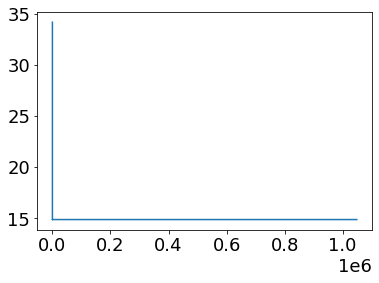

In [65]:
plt.plot(Js,err[:,0])

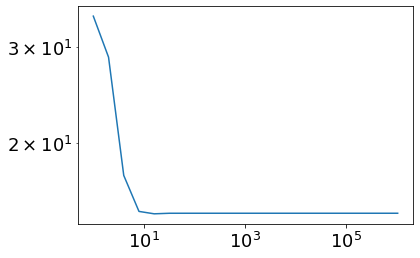

In [66]:
plt.loglog(Js,err[:,0])

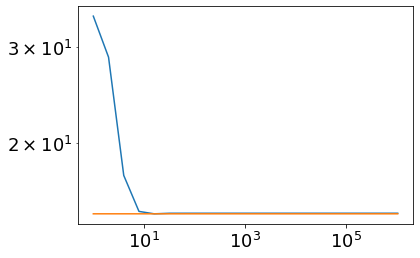

In [67]:
plt.loglog(Js,err[:,0])
plt.loglog(Js,err[:,1])

In [68]:
err[:,1]

array([14.8572498 , 14.8572612 , 14.85726306, 14.85726306, 14.85726306,
       14.85726306, 14.85726306, 14.85726306, 14.85726306, 14.85726306,
       14.85726306, 14.85726306, 14.85726306, 14.85726306, 14.85726306,
       14.85726306, 14.85726306, 14.85726306, 14.85726306, 14.85726306,
       14.85726306])

In [69]:
err[:,0]

array([34.20518936, 28.76976179, 17.46700879, 15.00821091, 14.85678788,
       14.8916229 , 14.89209417, 14.89223866, 14.89223494, 14.89221837,
       14.89221482, 14.89221912, 14.89221912, 14.89221912, 14.89221912,
       14.89221912, 14.89221912, 14.89221912, 14.89221912, 14.89221912,
       14.89221912])